In [2]:
import folium
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
# Nashville coordinates: 36.1627° N, 86.7816° W

coordinates = [36.1627, -86.7816]
latitude = coordinates[0]
longitude = coordinates[1]
nash_map = folium.Map(location=[latitude,longitude],zoom_start=10)
nash_map

In [9]:
url = 'https://raw.githubusercontent.com/OpenDataDE/State-zip-code-GeoJSON/master/tn_tennessee_zip_codes_geo.min.json'
df = gpd.read_file(url)

In [11]:
df.head()

,STATEFP10,ZCTA5CE10,GEOID10,CLASSFP10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,PARTFLG10,geometry
0,47,37710,4737710,B5,G6350,S,211712025,0,+36.1586321,-084.3161341,N,"POLYGON ((-84.27434 36.13099, -84.27447 36.130..."
1,47,37381,4737381,B5,G6350,S,360489702,38482384,+35.6871804,-084.8769930,N,"POLYGON ((-84.80164 35.76971, -84.80163 35.769..."
2,47,37701,4737701,B5,G6350,S,27309005,28530,+35.7927401,-083.9860671,N,"POLYGON ((-83.98049 35.82693, -83.98045 35.826..."
3,47,37886,4737886,B5,G6350,S,113625372,0,+35.7455878,-083.8047184,N,"POLYGON ((-83.89972 35.67276, -83.89920 35.672..."
4,47,37757,4737757,B5,G6350,S,72942123,8907166,+36.2990089,-084.1372987,N,"MULTIPOLYGON (((-84.15754 36.35430, -84.15683 ..."


In [17]:
zc = ['37148', '37221', '37174', '37115', '37210']
zc_df = df[df.ZCTA5CE10.isin(zc)]

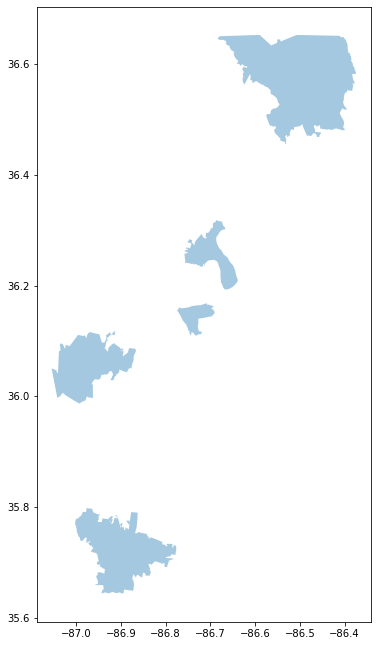

In [18]:
zc_plots = zc_df.plot(figsize=(6,12), alpha=0.4)

In [20]:
# Import fiona to create .geojson file from .GeoDataFrame
import fiona
fiona.supported_drivers

# Create .geojson file
zc_df.to_file("zc_df.geojson", driver='GeoJSON')

# import the libraries
import os
import sys
module_path = os.path.abspath(os.path.join(os.pardir, os.pardir))
if module_path not in sys.path:
    sys.path.append(module_path)

# Access the .geojson file
overlay1 = os.path.join('zc_df.geojson')

# Join overlay with nashville map above
folium.GeoJson(overlay1).add_to(nash_map)
nash_map


In [25]:
nash_map.save('index.jpg')

In [ ]:
import imgkit

imgkit.from_file('test.html', 'out.jpg')